In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from scipy import stats


In [12]:
# Load the dataset
file_path = 'DSU-Dataset.xlsx'
data = pd.read_excel(file_path)

# Check the column names and data types
print(data.columns)
print(data.dtypes)
print(data.head())



Index(['Claim ID', 'Service Date', 'Recieved Date', 'Paid Date', 'Patient ID',
       'Member Age', 'Gender', 'Marital Status', 'Ethnicity', 'LOB',
       'Network Status', 'Claim Category', 'Claim Subcategory', 'Claim Line',
       'Place of Service', 'Provider Type', 'Provider Specialty',
       'ICD10 Code 1', 'ICD10 Code 2', 'ICD10 Code 3', 'ICD10 Code 4',
       'ICD10 Code 5', 'ICD10 Code 6', 'ICD10 Code 7', 'ICD10 Code 8',
       'ICD10 Code 9', 'ICD10 Code 10', 'Service Type', 'Service Code',
       'Modifiers', 'High Cost Claim'],
      dtype='object')
Claim ID                      object
Service Date          datetime64[ns]
Recieved Date         datetime64[ns]
Paid Date             datetime64[ns]
Patient ID                    object
Member Age                    object
Gender                        object
Marital Status                object
Ethnicity                     object
LOB                           object
Network Status                object
Claim Category           

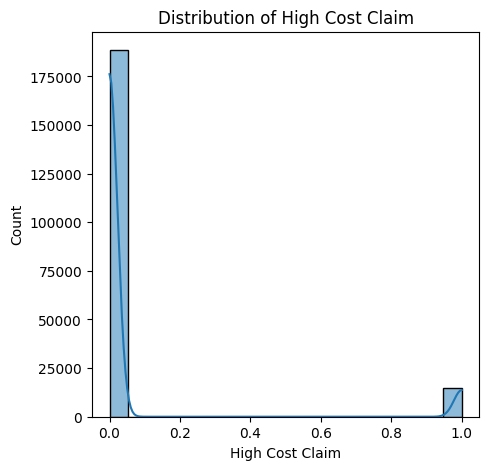

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'High Cost Claim' 
plt.figure(figsize=(5, 5))
sns.histplot(data['High Cost Claim'].dropna(), kde=True)
plt.title('Distribution of High Cost Claim')
plt.show()

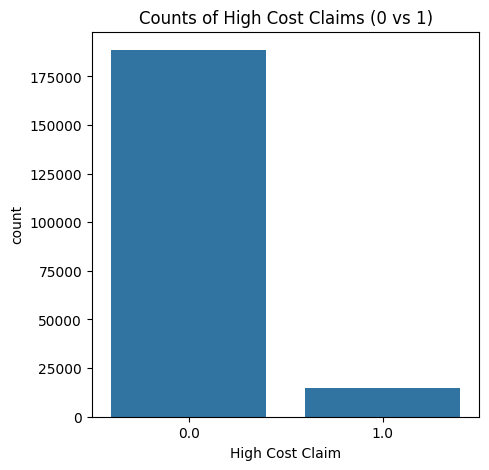

In [29]:
#barplot for high cost claims(categorical dstribution)
plt.figure(figsize=(5, 5))
sns.countplot(x=data['High Cost Claim'])
plt.title('Counts of High Cost Claims (0 vs 1)')
plt.show()


In [30]:

# Check dataset information
data.info()

# Get summary statistics for numeric columns
data.describe()

# Check for missing data
missing_data = data.isnull().sum()
missing_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253686 entries, 0 to 253685
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Claim ID                   253686 non-null  object        
 1   Service Date               253686 non-null  datetime64[ns]
 2   Recieved Date              253686 non-null  datetime64[ns]
 3   Paid Date                  253686 non-null  datetime64[ns]
 4   Patient ID                 253686 non-null  object        
 5   Member Age                 253686 non-null  object        
 6   Gender                     253686 non-null  object        
 7   Marital Status             241000 non-null  object        
 8   Ethnicity                  226800 non-null  object        
 9   LOB                        253686 non-null  object        
 10  Network Status             253686 non-null  object        
 11  Claim Category             253685 non-null  object  

Claim ID                          0
Service Date                      0
Recieved Date                     0
Paid Date                         0
Patient ID                        0
Member Age                        0
Gender                            0
Marital Status                12686
Ethnicity                     26886
LOB                               0
Network Status                    0
Claim Category                    1
Claim Subcategory                 1
Claim Line                        0
Place of Service                  0
Provider Type                    15
Provider Specialty                1
ICD10 Code 1                    936
ICD10 Code 2                  77532
ICD10 Code 3                 126214
ICD10 Code 4                 158049
ICD10 Code 5                 184221
ICD10 Code 6                 197657
ICD10 Code 7                 208424
ICD10 Code 8                 216220
ICD10 Code 9                 222172
ICD10 Code 10                226754
Service Type                

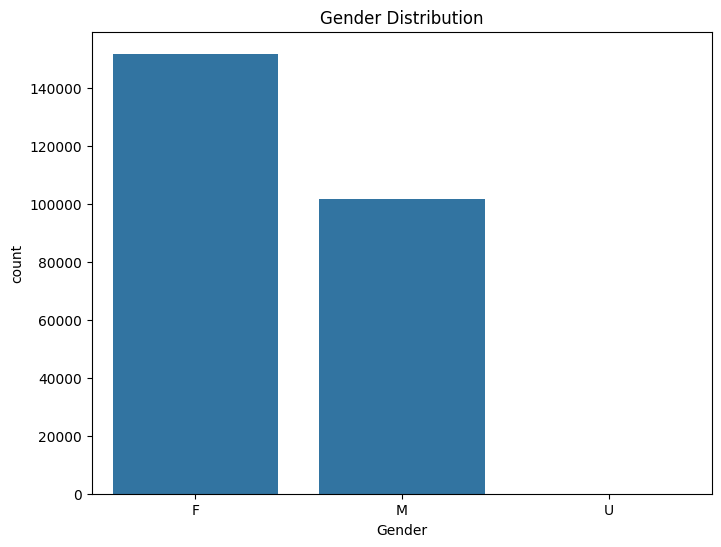

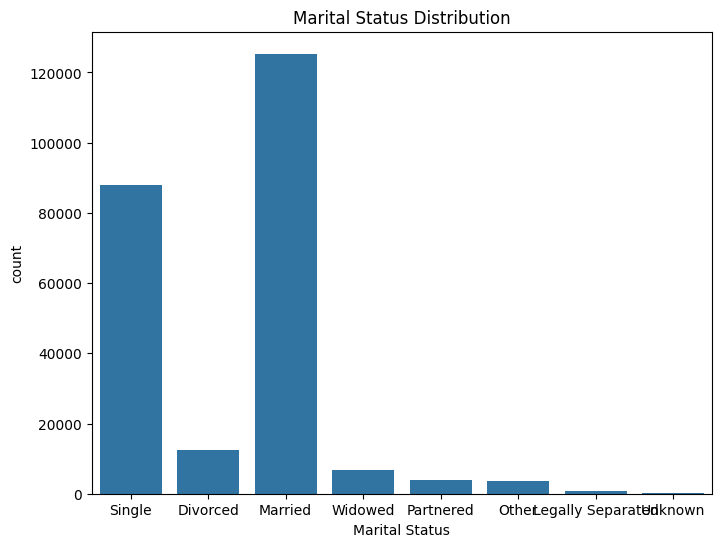

In [31]:
# Bar plot for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Bar plot for Marital Status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=data)
plt.title('Marital Status Distribution')
plt.show()

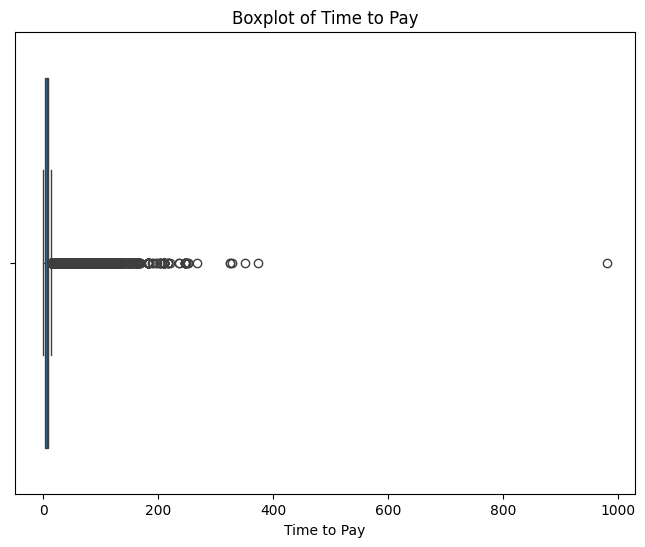

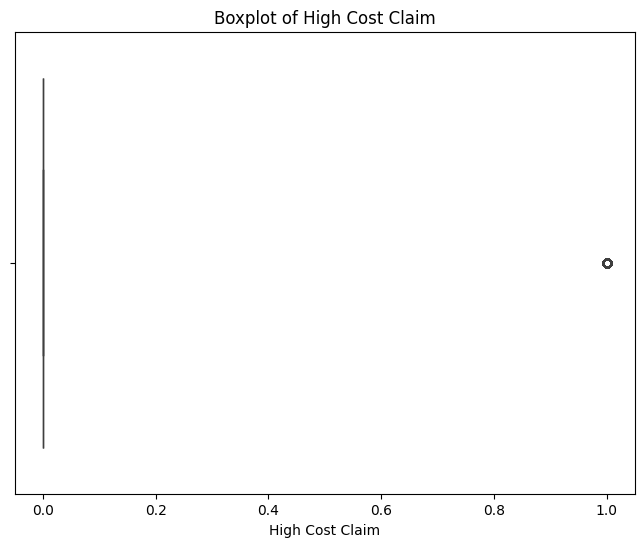

In [32]:
# Boxplot for 'Time to Pay' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Time to Pay'])
plt.title('Boxplot of Time to Pay')
plt.show()

# Boxplot for 'High Cost Claim' to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['High Cost Claim'])
plt.title('Boxplot of High Cost Claim')
plt.show()


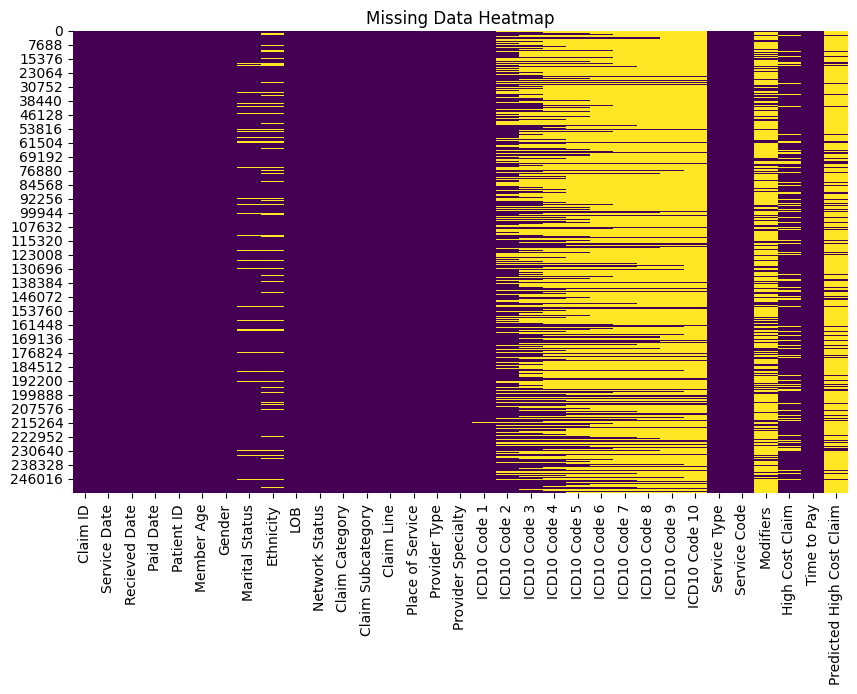

In [33]:
# Visualize missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()